In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
website_url=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
#print(soup.prettify())

In [4]:
My_table = soup.find('table',{'class':'wikitable sortable'})
links=My_table.findAll('tr')
#links

In [5]:
df = pd.DataFrame()
headers=My_table.findAll('th')
headings = [th.text.strip() for th in headers]    
headings

df = pd.DataFrame(columns=[headings[0], headings[1], headings[2]])

In [6]:
for link in links:
    tds = link.find_all('td')
    if len(tds) != 0:
        records = [td.text.strip() for td in tds]
        if records[2] =='Not assigned':
            records[2]=records[1]
        if records[1] != 'Not assigned':
            df=df.append({'Postcode': records[0],'Borough': records[1],'Neighbourhood': records[2]}, ignore_index=True)


In [7]:
df_new=df.groupby(['Postcode','Borough'])['Neighbourhood'].apply(lambda x: "%s" % ', '.join(x))
length=len(df_new)


df_final = pd.DataFrame()
df_final = pd.DataFrame(columns=['Postcode', 'Borough', 'Neighbourhood'])
i=0
for i in np.arange(0, length):
    df_final = df_final.append({'Postcode': str(df_new.index[i][0]),'Borough': str(df_new.index[i][1]),'Neighbourhood': str(df_new[i])}, ignore_index=True)



In [8]:
!pip install geocoder
import geocoder # import geocoder

In [9]:
geocord=pd.read_csv('http://cocl.us/Geospatial_data/Geospatial_Coordinates.csv')
geocord.rename(columns={'Postal Code': 'Postcode'}, inplace=True)

In [10]:
df_final_latlong=df_final.merge(geocord, on='Postcode', how='left')
df_final_latlong

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [11]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: ...working... done

# All requested packages already installed.



In [12]:
 !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: ...working... done

# All requested packages already installed.



In [13]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.653963, -79.387207.


In [14]:
df_toronto=df_final_latlong

In [15]:
# create map of New York using latitude and longitude values
map_final = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough'], df_toronto['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_final)  
    
map_final

In [16]:
CLIENT_ID = 'HUL4CRUZCLMKXUWUXDJDGHPOKZ1BMTR0QBBJEVBRLFQRAM0Y' # your Foursquare ID
CLIENT_SECRET = '2OQQLDFTQX3WQHT1ODJIZAWXSV5PTDBI2PC5SMS1YWEVYLTR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [17]:
neighborhood_latitude = df_toronto.loc[0,'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto.loc[0,'Longitude'] # neighborhood longitude value

neighborhood_name = df_toronto.loc[0,'Neighbourhood'] # neighborhood name

#neighborhood_latitude='43.836125'
#neighborhood_longitude='-79.205636'
#print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, neighborhood_latitude, neighborhood_longitude))

In [18]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=HUL4CRUZCLMKXUWUXDJDGHPOKZ1BMTR0QBBJEVBRLFQRAM0Y&client_secret=2OQQLDFTQX3WQHT1ODJIZAWXSV5PTDBI2PC5SMS1YWEVYLTR&v=20180605&ll=43.806686299999996,-79.19435340000001&radius=500&limit=100'

In [19]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d578855bf7dde002c4b320a'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 43.8111863045, 'lng': -79.18812958073042},
   'sw': {'lat': 43.80218629549999, 'lng': -79.2005772192696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6b9446edc76b0d771311c',
       'name': "Wendy's",
       'location': {'crossStreet': 'Morningside & Sheppard',
        'lat': 43.80744841934756,
        'lng': -79.19905558052072,
        'labeledLatLngs': [{'label': 'display'

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()
#nearby_venues.iloc[0]['id']

,id,name,categories,lat,lng
0,4bb6b9446edc76b0d771311c,Wendy's,Fast Food Restaurant,43.807448,-79.199056


In [22]:
#url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
#url = 'https://api.foursquare.com/v2/venues/&client_id={}&client_secret={}&v={}/4bb6b9446edc76b0d771311c?'.format(
#     CLIENT_ID, 
#    CLIENT_SECRET, 
#    VERSION,  
#    )
##venue_id = '4bb6b9446edc76b0d771311c' # ID of Harry's Italian Pizza Bar
##url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
##url


In [23]:
##result = requests.get(url).json()
#print(result['response']['venue'].keys())
##print(result['response']['venue']['rating'])
##print(result['response']['venue']['ratingSignals'])
##try:
   ## print(result['response']['venue']['rating'])
##except:
   ## print('This venue has not been rated yet.')

In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

1 venues were returned by Foursquare.


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                  'VenueID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [26]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighbourhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [27]:
print(toronto_venues.shape)
toronto_venues.head()

(2235, 8)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,4bb6b9446edc76b0d771311c,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,4c23d3aaf7ced13a5ed7216d,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,536bdf8f498ede143cca0072,Scarborough Historical Society,43.788755,-79.162438,History Museum
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,4b6074e3f964a5200fe729e3,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,4c62f34bde1b2d7fec89e370,G & G Electronics,43.765309,-79.191537,Electronics Store


In [98]:
#toronto_venues['Venue Category'].unique()
#check=toronto_venues[toronto_venues['Venue Category'].str.contains("Coffee")]
#check
df_coffee=toronto_venues[toronto_venues['Venue Category'].str.contains("Coffee")]
df_coffee.reset_index(drop=True)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Woburn,43.770992,-79.216917,4cc1d28c06c254815ac18547,Starbucks,43.770037,-79.221156,Coffee Shop
1,Woburn,43.770992,-79.216917,5164bf50e4b0ca7ab1d9ed8b,Tim Hortons,43.770827,-79.223078,Coffee Shop
2,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,4c6aa500c946e21ec432ed8e,Tim Hortons,43.726895,-79.266157,Coffee Shop
3,L'Amoreaux West,43.799525,-79.318389,4bd0cd2477b29c74b5838b82,Tim Hortons,43.799102,-79.318715,Coffee Shop
4,L'Amoreaux West,43.799525,-79.318389,4e4bcc4162e1ce23e579d8dc,Coffee Time,43.797952,-79.318678,Coffee Shop
5,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,50bceb3ae4b01dc9b287cc99,Aroma Espresso Bar,43.777700,-79.344652,Coffee Shop
6,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4af5d36ef964a52062fd21e3,Starbucks,43.777757,-79.344451,Coffee Shop
7,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,502fc355e4b0b49bb5791038,Tim Hortons,43.777964,-79.344715,Coffee Shop
8,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,5567bf49498e711ea9c1f3fd,Tim Hortons,43.774965,-79.346285,Coffee Shop
9,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4c3f205c80bc20a1d1ecab58,Tim Hortons,43.775249,-79.347740,Coffee Shop


In [102]:
check=df_coffee[df_coffee.VenueID =="4adc55c6f964a520bd2b21e3"]
check

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category
870,St. James Town,43.651494,-79.375418,4adc55c6f964a520bd2b21e3,Starbucks,43.649386,-79.378093,Coffee Shop
1345,"Design Exchange, Toronto Dominion Centre",43.647177,-79.381576,4adc55c6f964a520bd2b21e3,Starbucks,43.649386,-79.378093,Coffee Shop
1387,"Commerce Court, Victoria Hotel",43.648198,-79.379817,4adc55c6f964a520bd2b21e3,Starbucks,43.649386,-79.378093,Coffee Shop
1727,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846,4adc55c6f964a520bd2b21e3,Starbucks,43.649386,-79.378093,Coffee Shop
1843,"First Canadian Place, Underground city",43.648429,-79.382280,4adc55c6f964a520bd2b21e3,Starbucks,43.649386,-79.378093,Coffee Shop


In [29]:
df_coffee_count=df_coffee.groupby('Neighborhood').count()
df_coffee_count.reset_index()
df_coffee_count=df_coffee_count.drop(columns=[ 'Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude'],axis=1)
df_coffee_count=df_coffee_count.reset_index()
df_coffee_count.rename(columns={'Venue Category': '#ofCoffeeShops'})


,Neighborhood,VenueID,#ofCoffeeShops
0,"Adelaide, King, Richmond",8,8
1,"Albion Gardens, Beaumond Heights, Humbergate, ...",1,1
2,"Alderwood, Long Branch",1,1
3,"Bathurst Manor, Downsview North, Wilson Heights",2,2
4,"Bedford Park, Lawrence Manor East",2,2
5,Berczy Park,5,5
6,"Bloordale Gardens, Eringate, Markland Wood, Ol...",1,1
7,"Brockton, Exhibition Place, Parkdale Village",2,2
8,"CN Tower, Bathurst Quay, Island airport, Harbo...",1,1
9,"Cabbagetown, St. James Town",4,4


In [30]:
df_nocoffeeshop=toronto_venues[~toronto_venues['Venue Category'].str.contains("Coffee")]
df_nocoffeeshop.reset_index(drop=True)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,4bb6b9446edc76b0d771311c,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,4c23d3aaf7ced13a5ed7216d,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,536bdf8f498ede143cca0072,Scarborough Historical Society,43.788755,-79.162438,History Museum
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,4b6074e3f964a5200fe729e3,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,4c62f34bde1b2d7fec89e370,G & G Electronics,43.765309,-79.191537,Electronics Store
5,"Guildwood, Morningside, West Hill",43.763573,-79.188711,5411f741498e9ebd5e35d8bd,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
6,"Guildwood, Morningside, West Hill",43.763573,-79.188711,4c1c7f9bb306c9288f0464b7,Enterprise Rent-A-Car,43.764076,-79.193406,Rental Car Location
7,"Guildwood, Morningside, West Hill",43.763573,-79.188711,4b9008acf964a520737133e3,Woburn Medical Centre,43.766631,-79.192286,Medical Center
8,"Guildwood, Morningside, West Hill",43.763573,-79.188711,513b84e6e4b0ef935943c0ad,Lawrence Ave E & Kingston Rd,43.767704,-79.189490,Intersection
9,"Guildwood, Morningside, West Hill",43.763573,-79.188711,4d95bd2ddaec224bf7bf043e,Eggsmart,43.767800,-79.190466,Breakfast Spot


In [31]:
# one hot encoding
toronto_onehot = pd.get_dummies(df_nocoffeeshop[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = df_nocoffeeshop['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
toronto_onehot.shape

(2048, 272)

In [33]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032609,...,0.000000,0.0,0.010870,0.000000,0.000000,0.000000,0.000000,0.010870,0.0,0.01087
1,Agincourt,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
4,"Alderwood, Long Branch",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
5,"Bathurst Manor, Downsview North, Wilson Heights",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.0,0.00000
6,Bayview Village,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
7,"Bedford Park, Lawrence Manor East",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
8,Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
9,"Birch Cliff, Cliffside West",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000


In [34]:
toronto_grouped.shape

(100, 272)

In [35]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
              venue  freq
0              Café  0.05
1               Bar  0.04
2   Thai Restaurant  0.04
3        Steakhouse  0.04
4  Asian Restaurant  0.03


----Agincourt----
            venue  freq
0  Breakfast Spot  0.25
1          Lounge  0.25
2    Skating Rink  0.25
3  Clothing Store  0.25
4     Yoga Studio  0.00


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                 venue  freq
0           Playground   0.5
1                 Park   0.5
2          Yoga Studio   0.0
3        Metro Station   0.0
4  Monument / Landmark   0.0


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
                  venue  freq
0         Grocery Store   0.2
1              Pharmacy   0.1
2           Pizza Place   0.1
3  Fast Food Restaurant   0.1
4        Sandwich Place   0.1


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.25
1        Pharmacy  0.12
2

           venue  freq
0  Grocery Store  0.33
1  Shopping Mall  0.17
2           Bank  0.17
3           Park  0.17
4          Hotel  0.17


----Downsview, North Park, Upwood Park----
                        venue  freq
0  Construction & Landscaping  0.25
1            Basketball Court  0.25
2                      Bakery  0.25
3                        Park  0.25
4         Monument / Landmark  0.00


----East Birchmount Park, Ionview, Kennedy Park----
                venue  freq
0      Discount Store  0.25
1  Chinese Restaurant  0.25
2    Department Store  0.25
3         Bus Station  0.25
4         Yoga Studio  0.00


----East Toronto----
                 venue  freq
0                 Park  0.50
1          Pizza Place  0.25
2    Convenience Store  0.25
3        Metro Station  0.00
4  Monument / Landmark  0.00


----Emery, Humberlea----
                             venue  freq
0           Furniture / Home Store   0.5
1                   Baseball Field   0.5
2                      Yoga Stud

                venue  freq
0                Café  0.10
1           Bookstore  0.06
2  Italian Restaurant  0.06
3    Sushi Restaurant  0.06
4                 Bar  0.03


----Ryerson, Garden District----
                       venue  freq
0             Clothing Store  0.07
1             Cosmetics Shop  0.04
2  Middle Eastern Restaurant  0.03
3                       Café  0.03
4           Ramen Restaurant  0.02


----Scarborough Village----
                             venue  freq
0                       Playground   1.0
1                      Yoga Studio   0.0
2                    Metro Station   0.0
3              Monument / Landmark   0.0
4  Molecular Gastronomy Restaurant   0.0


----Silver Hills, York Mills----
                             venue  freq
0                        Cafeteria   1.0
1                      Yoga Studio   0.0
2               Mexican Restaurant   0.0
3              Monument / Landmark   0.0
4  Molecular Gastronomy Restaurant   0.0


----St. James Town----
     

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Café,Thai Restaurant,Steakhouse,Bar,Hotel,Asian Restaurant,American Restaurant,Breakfast Spot,Gym,Restaurant
1,Agincourt,Lounge,Breakfast Spot,Skating Rink,Clothing Store,Event Space,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant,Discount Store,Electronics Store
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Park,Playground,Women's Store,Dumpling Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Fast Food Restaurant,Beer Store,Discount Store,Japanese Restaurant,Sandwich Place,Fried Chicken Joint,Pizza Place,Pharmacy,Electronics Store
4,"Alderwood, Long Branch",Pizza Place,Gym,Pharmacy,Skating Rink,Sandwich Place,Pub,Pool,Women's Store,Dog Run,Diner


In [38]:
# set number of clusters
from sklearn.cluster import KMeans 
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]
labels = kmeans.labels_

In [39]:
# add clustering labels
##neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted['Cluster Labels'] = labels
#neighborhoods_venues_sorted['Cluster Labels']=neighborhoods_venues_sorted['Cluster Labels'].astype(int)
neighborhoods_venues_sorted
toronto_merged = df_toronto
toronto_merged.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
#toronto_merged = toronto_merged.astype({"Cluster Labels": int})
toronto_merged=toronto_merged.dropna()
toronto_merged=toronto_merged.reset_index()
toronto_merged[["Cluster Labels"]]=toronto_merged[["Cluster Labels"]].astype(int)
toronto_merged # check the last columns!


,index,Postcode,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,Fast Food Restaurant,Diner,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,2
1,1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,History Museum,Bar,Women's Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,1
2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Medical Center,Breakfast Spot,Rental Car Location,Pizza Place,Electronics Store,Intersection,Mexican Restaurant,Donut Shop,Dog Run,Doner Restaurant,1
3,3,M1G,Scarborough,Woburn,43.770992,-79.216917,Indian Restaurant,Korean Restaurant,Women's Store,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,1
4,4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,Hakka Restaurant,Athletics & Sports,Caribbean Restaurant,Bakery,Thai Restaurant,Bank,Fried Chicken Joint,Dive Bar,Doner Restaurant,Donut Shop,1
5,5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,Playground,Women's Store,Eastern European Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,3
6,6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,Discount Store,Department Store,Bus Station,Chinese Restaurant,Women's Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,1
7,7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,Bus Line,Bakery,Fast Food Restaurant,Intersection,Park,Bus Station,Metro Station,Soccer Field,Cuban Restaurant,Cosmetics Shop,1
8,8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,Motel,American Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Diner,1
9,9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,College Stadium,Skating Rink,General Entertainment,Café,Ethiopian Restaurant,Event Space,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Diner,1


In [40]:
# create map
!pip install colormap
import matplotlib
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
#from colormap.colors import rgb2hex

In [41]:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))

In [42]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['green','blue','red','yellow']#,'orange','black']
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [43]:
venue_id = '4bb6b9446edc76b0d771311c' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url


'https://api.foursquare.com/v2/venues/4bb6b9446edc76b0d771311c?client_id=HUL4CRUZCLMKXUWUXDJDGHPOKZ1BMTR0QBBJEVBRLFQRAM0Y&client_secret=2OQQLDFTQX3WQHT1ODJIZAWXSV5PTDBI2PC5SMS1YWEVYLTR&v=20180605'

In [44]:
result = requests.get(url).json()
#print(result['response']['venue'].keys())
#print(result['response']['venue']['rating'])
#print(result['response']['venue']['ratingSignals'])
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.9


In [45]:
#rating_venues = pd.DataFrame(columns=['ID',  'VenueRating', 'NumberofRating'])
#rating_venues#.columns = ['ID',  'VenueRating', 'NumberofRating']

In [46]:
#df_coffee

#def getratings(names, latitudes, longitudes, radius=500):
def getratings(vid):   
    rating_venues = pd.DataFrame(columns=['ID',  'VenueRating', 'NumberofRating'])
    for venueid in (vid):
        #print(venueid)
            
        # create the API request URL
        #########venue_id = venueid # ID of Harry's Italian Pizza Bar
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
        ###print(url)
            
        # make the GET request
        ##########results = requests.get(url).json()#["response"]['groups'][0]['items']
        #print(result['response']['venue']['rating'])
        #print(result['response']['venue']['ratingSignals'])
        try:
            x=(results['response']['venue']['rating'])
        except:
            x=0
        try:
            y=(results['response']['venue']['ratingSignals'])
        except:
            y=0
    
        rating_venues = rating_venues.append({'ID':venue_id,  'VenueRating': x, 'NumberofRating': y}, ignore_index=True)
        #print(rating_venues)
        # return only relevant information for each nearby venue
        #rating_list.append([(
            #id, 
            #try:
            #result['response']['venue']['rating']
            #except:
            #0,
            #try:
            #result['response']['venue']['ratingSignals']
            #except:
            #0
            
            #) for v in results])

   # rating_venues = pd.DataFrame([item for venue_list in rating_list for item in venue_list])
    #rating_venues.columns = ['ID', 
                #  'VenueRating', 
                 # 'NumberofRating',
                 # ]
    
    return(rating_venues)

In [90]:
#ratings=getratings(vid=df_coffee['VenueID'])
ratings=getratings(vid=df_coffee.loc[150:,'VenueID'])
#toronto_venues = getNearbyVenues(names=df_toronto['Neighbourhood'],
                                   #latitudes=df_toronto['Latitude'],
                                   #longitudes=df_toronto['Longitude']
                                  #)

In [91]:
#import requests
#results = requests.get(url).json()
#results

ratings

,ID,VenueRating,NumberofRating
0,563d2f2dcd10bcf27ae37c3b,0,0
1,59cd51c71b0ea516e9e7b3aa,8.8,22
2,4b6b4340f964a520c9fc2be3,8.3,101
3,592c5bfb31fd147e47255fb3,8,11
4,54132b3b498ee9ca9332e189,8.2,48
5,5a3a846af62e0960e9364d11,8,8
6,4bf438f0e5eba5936d671f90,7.5,43
7,4b981b46f964a520c22c35e3,8,39
8,4adc55c6f964a520bd2b21e3,7.9,337
9,4b198909f964a52006df23e3,8,65


In [92]:
ratings.to_csv(r'File Name4.csv')

In [125]:
path="C:/Users/GAURAV/Downloads/RatingsCombined.csv"
df_manualrating=pd.read_csv(path)

In [126]:
df_manualrating

,VenueID,VenueRating,NumberofRating
0,4cc1d28c06c254815ac18547,6.9,2
1,5164bf50e4b0ca7ab1d9ed8b,6.2,0
2,4c6aa500c946e21ec432ed8e,6.1,15
3,4bd0cd2477b29c74b5838b82,6.0,5
4,4e4bcc4162e1ce23e579d8dc,0.0,0
5,50bceb3ae4b01dc9b287cc99,6.9,20
6,4af5d36ef964a52062fd21e3,6.8,57
7,502fc355e4b0b49bb5791038,6.2,2
8,5567bf49498e711ea9c1f3fd,6.4,5
9,4c3f205c80bc20a1d1ecab58,6.3,1


In [128]:
df_manualrating.loc[(df_manualrating['VenueRating']!=0) & (df_manualrating['NumberofRating']==0), 'NumberofRating' ] = 1

df_manualrating=df_manualrating[(df_manualrating.VenueRating!=0) & (df_manualrating['NumberofRating']!=0)]

df_manualrating

,VenueID,VenueRating,NumberofRating
0,4cc1d28c06c254815ac18547,6.9,2
1,5164bf50e4b0ca7ab1d9ed8b,6.2,1
2,4c6aa500c946e21ec432ed8e,6.1,15
3,4bd0cd2477b29c74b5838b82,6.0,5
5,50bceb3ae4b01dc9b287cc99,6.9,20
6,4af5d36ef964a52062fd21e3,6.8,57
7,502fc355e4b0b49bb5791038,6.2,2
8,5567bf49498e711ea9c1f3fd,6.4,5
9,4c3f205c80bc20a1d1ecab58,6.3,1
10,4aedfeadf964a52005d121e3,7.8,126


In [131]:
df_manualrating.drop_duplicates(inplace=True)

df_manualrating
#test.loc[(test['VenueRating']!=0) & (test['NumberofRating']==0), 'NumberofRating' ] = 1
#test

,VenueID,VenueRating,NumberofRating
0,4cc1d28c06c254815ac18547,6.9,2
1,5164bf50e4b0ca7ab1d9ed8b,6.2,1
2,4c6aa500c946e21ec432ed8e,6.1,15
3,4bd0cd2477b29c74b5838b82,6.0,5
5,50bceb3ae4b01dc9b287cc99,6.9,20
6,4af5d36ef964a52062fd21e3,6.8,57
7,502fc355e4b0b49bb5791038,6.2,2
8,5567bf49498e711ea9c1f3fd,6.4,5
9,4c3f205c80bc20a1d1ecab58,6.3,1
10,4aedfeadf964a52005d121e3,7.8,126


In [59]:
#test=test[test.VenueRating!=5.45]
#test
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,4bb6b9446edc76b0d771311c,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,4c23d3aaf7ced13a5ed7216d,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,536bdf8f498ede143cca0072,Scarborough Historical Society,43.788755,-79.162438,History Museum
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,4b6074e3f964a5200fe729e3,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,4c62f34bde1b2d7fec89e370,G & G Electronics,43.765309,-79.191537,Electronics Store


In [79]:
toronto_merged.head()

,index,Postcode,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,Fast Food Restaurant,Diner,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,2
1,1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,History Museum,Bar,Women's Store,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,1
2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Medical Center,Breakfast Spot,Rental Car Location,Pizza Place,Electronics Store,Intersection,Mexican Restaurant,Donut Shop,Dog Run,Doner Restaurant,1
3,3,M1G,Scarborough,Woburn,43.770992,-79.216917,Indian Restaurant,Korean Restaurant,Women's Store,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,1
4,4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,Hakka Restaurant,Athletics & Sports,Caribbean Restaurant,Bakery,Thai Restaurant,Bank,Fried Chicken Joint,Dive Bar,Doner Restaurant,Donut Shop,1


In [120]:
#df_coffee.loc[150:,'VenueID']
#df_temp=df_coffee
#df_coffee=df_coffee.reset_index(drop=True)
df_coffee

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category
10,Woburn,43.770992,-79.216917,4cc1d28c06c254815ac18547,Starbucks,43.770037,-79.221156,Coffee Shop
11,Woburn,43.770992,-79.216917,5164bf50e4b0ca7ab1d9ed8b,Tim Hortons,43.770827,-79.223078,Coffee Shop
23,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,4c6aa500c946e21ec432ed8e,Tim Hortons,43.726895,-79.266157,Coffee Shop
79,L'Amoreaux West,43.799525,-79.318389,4bd0cd2477b29c74b5838b82,Tim Hortons,43.799102,-79.318715,Coffee Shop
83,L'Amoreaux West,43.799525,-79.318389,4e4bcc4162e1ce23e579d8dc,Coffee Time,43.797952,-79.318678,Coffee Shop
103,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,50bceb3ae4b01dc9b287cc99,Aroma Espresso Bar,43.777700,-79.344652,Coffee Shop
108,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4af5d36ef964a52062fd21e3,Starbucks,43.777757,-79.344451,Coffee Shop
116,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,502fc355e4b0b49bb5791038,Tim Hortons,43.777964,-79.344715,Coffee Shop
122,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,5567bf49498e711ea9c1f3fd,Tim Hortons,43.774965,-79.346285,Coffee Shop
124,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4c3f205c80bc20a1d1ecab58,Tim Hortons,43.775249,-79.347740,Coffee Shop


In [139]:
#toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
#toronto_merged = toronto_merged.astype({"Cluster Labels": int})
#toronto_merged=toronto_merged.dropna()
#toronto_merged=toronto_merged.reset_index()
#toronto_merged[["Cluster Labels"]]=toronto_merged[["Cluster Labels"]].astype(int)
#toronto_merged

#df_coffeeshops = df_coffee.join(df_manualrating.set_index(), on='VenueID')


df_coffeeshops = pd.merge(df_coffee, df_manualrating, on=['VenueID'])
df_coffeeshops= pd.merge(df_coffeeshops,toronto_merged, on=['Neighborhood'])
df_coffeeshops=df_coffeeshops[['Postcode','Borough','Neighborhood','Neighborhood Latitude','Neighborhood Longitude','VenueID','Venue','Venue Latitude','Venue Longitude','Venue Category','VenueRating','NumberofRating','Cluster Labels']]
df_coffeeshops.drop_duplicates(inplace=True)
df_coffeeshops

,Postcode,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category,VenueRating,NumberofRating,Cluster Labels
0,M1G,Scarborough,Woburn,43.770992,-79.216917,4cc1d28c06c254815ac18547,Starbucks,43.770037,-79.221156,Coffee Shop,6.9,2,1
1,M1G,Scarborough,Woburn,43.770992,-79.216917,5164bf50e4b0ca7ab1d9ed8b,Tim Hortons,43.770827,-79.223078,Coffee Shop,6.2,1,1
2,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,4c6aa500c946e21ec432ed8e,Tim Hortons,43.726895,-79.266157,Coffee Shop,6.1,15,1
3,M1W,Scarborough,L'Amoreaux West,43.799525,-79.318389,4bd0cd2477b29c74b5838b82,Tim Hortons,43.799102,-79.318715,Coffee Shop,6.0,5,1
4,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,50bceb3ae4b01dc9b287cc99,Aroma Espresso Bar,43.777700,-79.344652,Coffee Shop,6.9,20,1
5,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4af5d36ef964a52062fd21e3,Starbucks,43.777757,-79.344451,Coffee Shop,6.8,57,1
6,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,502fc355e4b0b49bb5791038,Tim Hortons,43.777964,-79.344715,Coffee Shop,6.2,2,1
7,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,5567bf49498e711ea9c1f3fd,Tim Hortons,43.774965,-79.346285,Coffee Shop,6.4,5,1
8,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4c3f205c80bc20a1d1ecab58,Tim Hortons,43.775249,-79.347740,Coffee Shop,6.3,1,1
9,M2N,North York,Willowdale South,43.770120,-79.408493,4aedfeadf964a52005d121e3,Starbucks,43.768192,-79.413021,Coffee Shop,7.8,126,1


In [182]:
#df_coffeeshops.Venue.unique()
#df_coffeeshops['Brand']

#test = df_coffeeshops.groupby('Venue')['NumberofRating'].nunique()
#test = df_coffeeshops[(df_coffeeshops['Cluster Labels'] == 1)]
#test

df_coffeeshops.reset_index(drop=True)

,Postcode,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category,VenueRating,NumberofRating,Cluster Labels
0,M1G,Scarborough,Woburn,43.770992,-79.216917,4cc1d28c06c254815ac18547,Starbucks,43.770037,-79.221156,Coffee Shop,6.9,2,1
1,M1G,Scarborough,Woburn,43.770992,-79.216917,5164bf50e4b0ca7ab1d9ed8b,Tim Hortons,43.770827,-79.223078,Coffee Shop,6.2,1,1
2,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,4c6aa500c946e21ec432ed8e,Tim Hortons,43.726895,-79.266157,Coffee Shop,6.1,15,1
3,M1W,Scarborough,L'Amoreaux West,43.799525,-79.318389,4bd0cd2477b29c74b5838b82,Tim Hortons,43.799102,-79.318715,Coffee Shop,6.0,5,1
4,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,50bceb3ae4b01dc9b287cc99,Aroma Espresso Bar,43.777700,-79.344652,Coffee Shop,6.9,20,1
5,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4af5d36ef964a52062fd21e3,Starbucks,43.777757,-79.344451,Coffee Shop,6.8,57,1
6,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,502fc355e4b0b49bb5791038,Tim Hortons,43.777964,-79.344715,Coffee Shop,6.2,2,1
7,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,5567bf49498e711ea9c1f3fd,Tim Hortons,43.774965,-79.346285,Coffee Shop,6.4,5,1
8,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4c3f205c80bc20a1d1ecab58,Tim Hortons,43.775249,-79.347740,Coffee Shop,6.3,1,1
9,M2N,North York,Willowdale South,43.770120,-79.408493,4aedfeadf964a52005d121e3,Starbucks,43.768192,-79.413021,Coffee Shop,7.8,126,1


In [224]:
df_coffeeshops.to_csv(r'CoffeeShop.csv')

In [183]:
df_coffeeshops['TotalShopRating']=df_coffeeshops['VenueRating']*df_coffeeshops['NumberofRating']
#df_coffeeshops['Brand']
#df_coffeeshops

,Postcode,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category,VenueRating,NumberofRating,Cluster Labels,TotalShopRating
0,M1G,Scarborough,Woburn,43.770992,-79.216917,4cc1d28c06c254815ac18547,Starbucks,43.770037,-79.221156,Coffee Shop,6.9,2,1,13.8
1,M1G,Scarborough,Woburn,43.770992,-79.216917,5164bf50e4b0ca7ab1d9ed8b,Tim Hortons,43.770827,-79.223078,Coffee Shop,6.2,1,1,6.2
2,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,4c6aa500c946e21ec432ed8e,Tim Hortons,43.726895,-79.266157,Coffee Shop,6.1,15,1,91.5
3,M1W,Scarborough,L'Amoreaux West,43.799525,-79.318389,4bd0cd2477b29c74b5838b82,Tim Hortons,43.799102,-79.318715,Coffee Shop,6.0,5,1,30.0
4,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,50bceb3ae4b01dc9b287cc99,Aroma Espresso Bar,43.777700,-79.344652,Coffee Shop,6.9,20,1,138.0
5,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4af5d36ef964a52062fd21e3,Starbucks,43.777757,-79.344451,Coffee Shop,6.8,57,1,387.6
6,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,502fc355e4b0b49bb5791038,Tim Hortons,43.777964,-79.344715,Coffee Shop,6.2,2,1,12.4
7,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,5567bf49498e711ea9c1f3fd,Tim Hortons,43.774965,-79.346285,Coffee Shop,6.4,5,1,32.0
8,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4c3f205c80bc20a1d1ecab58,Tim Hortons,43.775249,-79.347740,Coffee Shop,6.3,1,1,6.3
9,M2N,North York,Willowdale South,43.770120,-79.408493,4aedfeadf964a52005d121e3,Starbucks,43.768192,-79.413021,Coffee Shop,7.8,126,1,982.8


In [209]:
ShopCounts=df_coffeeshops.Venue.value_counts()
ShopCounts=ShopCounts.to_frame()
ShopCounts=ShopCounts.reset_index()
ShopCounts

,index,Venue
0,Starbucks,67
1,Tim Hortons,38
2,Second Cup,5
3,Dineen @CommerceCourt,5
4,Pilot Coffee Roasters,5
5,Balzac's Coffee,3
6,M Square Coffee Co,3
7,Aroma Espresso Bar,3
8,Everyday Gourmet (Teas & Coffees),2
9,Starbucks (MaRS),2


In [210]:
ShopCounts=ShopCounts.rename(columns={"Venue": "#ofoutletsofbrand"})
ShopCounts=ShopCounts.rename(columns={"index": "Venue"})
ShopCounts

,Venue,#ofoutletsofbrand
0,Starbucks,67
1,Tim Hortons,38
2,Second Cup,5
3,Dineen @CommerceCourt,5
4,Pilot Coffee Roasters,5
5,Balzac's Coffee,3
6,M Square Coffee Co,3
7,Aroma Espresso Bar,3
8,Everyday Gourmet (Teas & Coffees),2
9,Starbucks (MaRS),2


In [211]:
df_coffeeshops= pd.merge(df_coffeeshops,ShopCounts, on=['Venue'])
#df_coffeeshops

,Postcode,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category,VenueRating,NumberofRating,Cluster Labels,TotalShopRating,#ofoutletsofbrand
0,M1G,Scarborough,Woburn,43.770992,-79.216917,4cc1d28c06c254815ac18547,Starbucks,43.770037,-79.221156,Coffee Shop,6.9,2,1,13.8,67
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4af5d36ef964a52062fd21e3,Starbucks,43.777757,-79.344451,Coffee Shop,6.8,57,1,387.6,67
2,M2N,North York,Willowdale South,43.770120,-79.408493,4aedfeadf964a52005d121e3,Starbucks,43.768192,-79.413021,Coffee Shop,7.8,126,1,982.8,67
3,M2N,North York,Willowdale South,43.770120,-79.408493,58ee9d7a0393cc6b4d009ea1,Starbucks,43.768627,-79.413100,Coffee Shop,7.0,2,1,14.0,67
4,M3H,North York,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,4b05f2bef964a52064e622e3,Starbucks,43.755653,-79.439873,Coffee Shop,7.5,45,1,337.5,67
5,M4G,East York,Leaside,43.709060,-79.363452,5bdc668eccad6b00396880f6,Starbucks,43.705704,-79.361351,Coffee Shop,6.7,1,1,6.7,67
6,M4G,East York,Leaside,43.709060,-79.363452,4afc536ff964a520922122e3,Starbucks,43.710342,-79.360948,Coffee Shop,5.5,81,1,445.5,67
7,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,4adcba1cf964a520272f21e3,Starbucks,43.678730,-79.346188,Coffee Shop,6.0,73,1,438.0,67
8,M4M,East Toronto,Studio District,43.659526,-79.340923,4ade03e3f964a5205d6721e3,Starbucks,43.660640,-79.342461,Coffee Shop,7.3,47,1,343.1,67
9,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,4aec6bbaf964a520e6c621e3,Starbucks,43.715456,-79.400303,Coffee Shop,7.3,57,1,416.1,67


In [237]:
df_coffeeshops['Brand']='Others'
df_coffeeshops.loc[(df_coffeeshops['#ofoutletsofbrand']>2) , 'Brand' ] = df_coffeeshops['Venue']
df_coffeeshops.loc[(df_coffeeshops['#ofoutletsofbrand']<=2) , '#ofoutletsofbrand' ] = 67
df_coffeeshops

,Postcode,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category,VenueRating,NumberofRating,Cluster Labels,TotalShopRating,#ofoutletsofbrand,Brand
0,M1G,Scarborough,Woburn,43.770992,-79.216917,4cc1d28c06c254815ac18547,Starbucks,43.770037,-79.221156,Coffee Shop,6.9,2,1,13.8,67,Starbucks
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4af5d36ef964a52062fd21e3,Starbucks,43.777757,-79.344451,Coffee Shop,6.8,57,1,387.6,67,Starbucks
2,M2N,North York,Willowdale South,43.770120,-79.408493,4aedfeadf964a52005d121e3,Starbucks,43.768192,-79.413021,Coffee Shop,7.8,126,1,982.8,67,Starbucks
3,M2N,North York,Willowdale South,43.770120,-79.408493,58ee9d7a0393cc6b4d009ea1,Starbucks,43.768627,-79.413100,Coffee Shop,7.0,2,1,14.0,67,Starbucks
4,M3H,North York,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,4b05f2bef964a52064e622e3,Starbucks,43.755653,-79.439873,Coffee Shop,7.5,45,1,337.5,67,Starbucks
5,M4G,East York,Leaside,43.709060,-79.363452,5bdc668eccad6b00396880f6,Starbucks,43.705704,-79.361351,Coffee Shop,6.7,1,1,6.7,67,Starbucks
6,M4G,East York,Leaside,43.709060,-79.363452,4afc536ff964a520922122e3,Starbucks,43.710342,-79.360948,Coffee Shop,5.5,81,1,445.5,67,Starbucks
7,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,4adcba1cf964a520272f21e3,Starbucks,43.678730,-79.346188,Coffee Shop,6.0,73,1,438.0,67,Starbucks
8,M4M,East Toronto,Studio District,43.659526,-79.340923,4ade03e3f964a5205d6721e3,Starbucks,43.660640,-79.342461,Coffee Shop,7.3,47,1,343.1,67,Starbucks
9,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,4aec6bbaf964a520e6c621e3,Starbucks,43.715456,-79.400303,Coffee Shop,7.3,57,1,416.1,67,Starbucks


In [297]:
df_Brand =(df_coffeeshops.groupby('Brand')
           .agg({'#ofoutletsofbrand': 'mean','NumberofRating':'sum', 'TotalShopRating': 'sum'})
           .reset_index()
           #.rename(columns={'Organisation Name':'Organisation Count'})
             )
df_Brand['AvgRating']=df_Brand['TotalShopRating']/df_Brand['NumberofRating']
df_Brand['AvgRating']=df_Brand['AvgRating'].round(1)
#df_Brand = df_Brand.sort(['AvgRating'])
df_Brand
#df_Brand.rename(columns={'Organisation Name':'Organisation Count'})

,Brand,#ofoutletsofbrand,NumberofRating,TotalShopRating,AvgRating
0,Aroma Espresso Bar,3,97,726.7,7.5
1,Balzac's Coffee,3,213,1642.3,7.7
2,Dineen @CommerceCourt,5,55,440.0,8.0
3,M Square Coffee Co,3,144,1180.8,8.2
4,Others,67,3231,26929.3,8.3
5,Pilot Coffee Roasters,5,102,883.6,8.7
6,Second Cup,5,99,623.4,6.3
7,Starbucks,67,5308,40775.2,7.7
8,Tim Hortons,38,816,5659.7,6.9


In [298]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Brands')

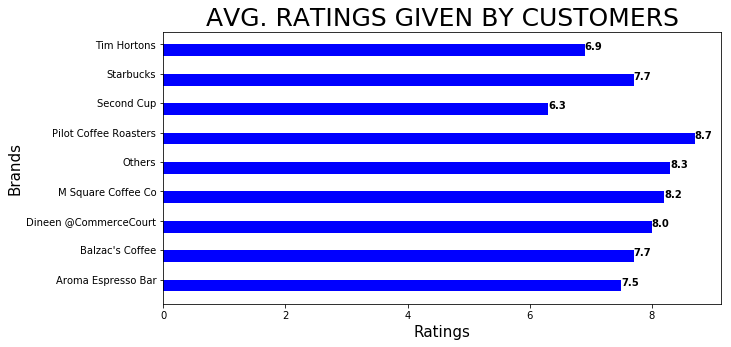

In [301]:
x=df_Brand['Brand']
y=df_Brand['AvgRating']


fig, ax = plt.subplots(figsize=(10, 5))
width = 0.4
ind = np.arange(len(y))
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v, i, str(v), color='black', fontweight='bold')
plt.title('AVG. RATINGS GIVEN BY CUSTOMERS',FONTSIZE=25)
plt.xlabel('Ratings',FONTSIZE=15)
plt.ylabel('Brands',FONTSIZE=15)      
#plt.show()
#plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight')

In [335]:
df_coffeeshops.describe()

,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,VenueRating,NumberofRating,Cluster Labels,TotalShopRating,#ofoutletsofbrand
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.0,178.000000,178.000000
mean,43.669804,-79.388133,43.669763,-79.388022,7.420225,56.544944,1.0,443.039326,52.348315
std,0.038521,0.048290,0.038169,0.048415,0.871868,78.950394,0.0,652.568060,22.331656
min,43.602414,-79.615819,43.602396,-79.621020,5.500000,1.000000,1.0,6.200000,3.000000
25%,43.647927,-79.389494,43.648251,-79.390252,6.800000,12.000000,1.0,88.200000,38.000000
50%,43.654260,-79.381752,43.654557,-79.380980,7.550000,29.000000,1.0,223.350000,67.000000
75%,43.667967,-79.374846,43.669253,-79.376217,8.000000,65.000000,1.0,508.800000,67.000000
max,43.799525,-79.216917,43.799102,-79.221156,9.200000,536.000000,1.0,4502.400000,67.000000


In [341]:

conditions = [
    (df_coffeeshops['VenueRating'] >= 8.00) ,
    (df_coffeeshops['VenueRating'] >= 6.88) & (df_coffeeshops['VenueRating'] < 8.00),
    (df_coffeeshops['VenueRating'] < 6.88)]
choices = [1,2,3]
df_coffeeshops['color'] = np.select(conditions, choices, default=0)
df_coffeeshops

,Postcode,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category,VenueRating,NumberofRating,Cluster Labels,TotalShopRating,#ofoutletsofbrand,Brand,color
0,M1G,Scarborough,Woburn,43.770992,-79.216917,4cc1d28c06c254815ac18547,Starbucks,43.770037,-79.221156,Coffee Shop,6.9,2,1,13.8,67,Starbucks,2
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4af5d36ef964a52062fd21e3,Starbucks,43.777757,-79.344451,Coffee Shop,6.8,57,1,387.6,67,Starbucks,3
2,M2N,North York,Willowdale South,43.770120,-79.408493,4aedfeadf964a52005d121e3,Starbucks,43.768192,-79.413021,Coffee Shop,7.8,126,1,982.8,67,Starbucks,2
3,M2N,North York,Willowdale South,43.770120,-79.408493,58ee9d7a0393cc6b4d009ea1,Starbucks,43.768627,-79.413100,Coffee Shop,7.0,2,1,14.0,67,Starbucks,2
4,M3H,North York,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,4b05f2bef964a52064e622e3,Starbucks,43.755653,-79.439873,Coffee Shop,7.5,45,1,337.5,67,Starbucks,2
5,M4G,East York,Leaside,43.709060,-79.363452,5bdc668eccad6b00396880f6,Starbucks,43.705704,-79.361351,Coffee Shop,6.7,1,1,6.7,67,Starbucks,3
6,M4G,East York,Leaside,43.709060,-79.363452,4afc536ff964a520922122e3,Starbucks,43.710342,-79.360948,Coffee Shop,5.5,81,1,445.5,67,Starbucks,3
7,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,4adcba1cf964a520272f21e3,Starbucks,43.678730,-79.346188,Coffee Shop,6.0,73,1,438.0,67,Starbucks,3
8,M4M,East Toronto,Studio District,43.659526,-79.340923,4ade03e3f964a5205d6721e3,Starbucks,43.660640,-79.342461,Coffee Shop,7.3,47,1,343.1,67,Starbucks,2
9,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,4aec6bbaf964a520e6c621e3,Starbucks,43.715456,-79.400303,Coffee Shop,7.3,57,1,416.1,67,Starbucks,2


In [344]:
test_Starbucks=df_coffeeshops[(df_coffeeshops.Brand=='Starbucks')]#'VenueRating']
test_Starbucks.describe()

,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,VenueRating,NumberofRating,Cluster Labels,TotalShopRating,#ofoutletsofbrand,color
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0,67.000000,67.0,67.000000
mean,43.665064,-79.388963,43.665075,-79.388898,7.461194,79.223881,1.0,608.585075,67.0,1.925373
std,0.035636,0.048691,0.035380,0.048945,0.618394,85.860320,0.0,680.766557,0.0,0.610847
min,43.636847,-79.615819,43.636888,-79.621020,5.500000,1.000000,1.0,6.700000,67.0,1.000000
25%,43.646435,-79.387383,43.646936,-79.385761,7.250000,21.500000,1.0,152.000000,67.0,2.000000
50%,43.648429,-79.381576,43.649386,-79.380957,7.500000,57.000000,1.0,387.600000,67.0,2.000000
75%,43.660913,-79.375418,43.660526,-79.378093,7.900000,101.000000,1.0,838.300000,67.0,2.000000
max,43.778517,-79.216917,43.777757,-79.221156,8.400000,337.000000,1.0,2662.300000,67.0,3.000000


In [347]:
conditions = [
    (test_Starbucks['VenueRating'] >= 7.9) ,
    (test_Starbucks['VenueRating'] >= 7.25) & (test_Starbucks['VenueRating'] < 7.9),
    (test_Starbucks['VenueRating'] < 7.25)]
choices = [1,2,3]
test_Starbucks['color'] = np.select(conditions, choices, default=0)
test_Starbucks

C:\Users\GAURAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Postcode,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category,VenueRating,NumberofRating,Cluster Labels,TotalShopRating,#ofoutletsofbrand,Brand,color
0,M1G,Scarborough,Woburn,43.770992,-79.216917,4cc1d28c06c254815ac18547,Starbucks,43.770037,-79.221156,Coffee Shop,6.9,2,1,13.8,67,Starbucks,3
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4af5d36ef964a52062fd21e3,Starbucks,43.777757,-79.344451,Coffee Shop,6.8,57,1,387.6,67,Starbucks,3
2,M2N,North York,Willowdale South,43.770120,-79.408493,4aedfeadf964a52005d121e3,Starbucks,43.768192,-79.413021,Coffee Shop,7.8,126,1,982.8,67,Starbucks,2
3,M2N,North York,Willowdale South,43.770120,-79.408493,58ee9d7a0393cc6b4d009ea1,Starbucks,43.768627,-79.413100,Coffee Shop,7.0,2,1,14.0,67,Starbucks,3
4,M3H,North York,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,4b05f2bef964a52064e622e3,Starbucks,43.755653,-79.439873,Coffee Shop,7.5,45,1,337.5,67,Starbucks,2
5,M4G,East York,Leaside,43.709060,-79.363452,5bdc668eccad6b00396880f6,Starbucks,43.705704,-79.361351,Coffee Shop,6.7,1,1,6.7,67,Starbucks,3
6,M4G,East York,Leaside,43.709060,-79.363452,4afc536ff964a520922122e3,Starbucks,43.710342,-79.360948,Coffee Shop,5.5,81,1,445.5,67,Starbucks,3
7,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,4adcba1cf964a520272f21e3,Starbucks,43.678730,-79.346188,Coffee Shop,6.0,73,1,438.0,67,Starbucks,3
8,M4M,East Toronto,Studio District,43.659526,-79.340923,4ade03e3f964a5205d6721e3,Starbucks,43.660640,-79.342461,Coffee Shop,7.3,47,1,343.1,67,Starbucks,2
9,M4R,Central Toronto,North Toronto West,43.715383,-79.405678,4aec6bbaf964a520e6c621e3,Starbucks,43.715456,-79.400303,Coffee Shop,7.3,57,1,416.1,67,Starbucks,2


In [348]:
test_Tim_Hortons=df_coffeeshops[(df_coffeeshops.Brand=='Tim Hortons')]#'VenueRating']
test_Tim_Hortons.describe()

,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,VenueRating,NumberofRating,Cluster Labels,TotalShopRating,#ofoutletsofbrand,color
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.0,38.000000
mean,43.695921,-79.394610,43.695021,-79.394996,6.542105,21.473684,1.0,148.939474,38.0,2.657895
std,0.052713,0.076063,0.052637,0.075936,0.665209,25.337438,0.0,187.326610,0.0,0.582461
min,43.602414,-79.615819,43.602396,-79.615655,5.600000,1.000000,1.0,6.200000,38.0,1.000000
25%,43.654985,-79.405678,43.656662,-79.402593,6.125000,5.000000,1.0,30.125000,38.0,2.000000
50%,43.670338,-79.381752,43.671484,-79.383847,6.300000,13.000000,1.0,93.200000,38.0,3.000000
75%,43.731944,-79.361340,43.733241,-79.357437,7.075000,25.500000,1.0,173.950000,38.0,3.000000
max,43.799525,-79.216917,43.799102,-79.223078,8.400000,113.000000,1.0,836.200000,38.0,3.000000


In [349]:
conditions = [
    (test_Tim_Hortons['VenueRating'] >= 7.075) ,
    (test_Tim_Hortons['VenueRating'] >= 6.125) & (test_Tim_Hortons['VenueRating'] < 7.075),
    (test_Tim_Hortons['VenueRating'] < 6.125)]
choices = [1,2,3]
test_Tim_Hortons['color'] = np.select(conditions, choices, default=0)
test_Tim_Hortons

C:\Users\GAURAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Postcode,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,VenueID,Venue,Venue Latitude,Venue Longitude,Venue Category,VenueRating,NumberofRating,Cluster Labels,TotalShopRating,#ofoutletsofbrand,Brand,color
67,M1G,Scarborough,Woburn,43.770992,-79.216917,5164bf50e4b0ca7ab1d9ed8b,Tim Hortons,43.770827,-79.223078,Coffee Shop,6.2,1,1,6.2,38,Tim Hortons,2
68,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029,4c6aa500c946e21ec432ed8e,Tim Hortons,43.726895,-79.266157,Coffee Shop,6.1,15,1,91.5,38,Tim Hortons,3
69,M1W,Scarborough,L'Amoreaux West,43.799525,-79.318389,4bd0cd2477b29c74b5838b82,Tim Hortons,43.799102,-79.318715,Coffee Shop,6.0,5,1,30.0,38,Tim Hortons,3
70,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,502fc355e4b0b49bb5791038,Tim Hortons,43.777964,-79.344715,Coffee Shop,6.2,2,1,12.4,38,Tim Hortons,2
71,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,5567bf49498e711ea9c1f3fd,Tim Hortons,43.774965,-79.346285,Coffee Shop,6.4,5,1,32.0,38,Tim Hortons,2
72,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,4c3f205c80bc20a1d1ecab58,Tim Hortons,43.775249,-79.347740,Coffee Shop,6.3,1,1,6.3,38,Tim Hortons,2
73,M2R,North York,Willowdale West,43.782736,-79.442259,4bc75114af07a59340f07e2d,Tim Hortons,43.780940,-79.444231,Coffee Shop,6.5,21,1,136.5,38,Tim Hortons,2
74,M3C,North York,"Flemingdon Park, Don Mills South",43.725900,-79.340923,4bec7af349430f4760c807d2,Tim Hortons,43.722897,-79.339117,Coffee Shop,6.7,10,1,67.0,38,Tim Hortons,2
75,M3H,North York,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,5011603fe4b07c3cf1967fba,Tim Hortons,43.754767,-79.443250,Coffee Shop,7.2,42,1,302.4,38,Tim Hortons,1
76,M3J,North York,"Northwood Park, York University",43.767980,-79.487262,4b87e845f964a5203dd231e3,Tim Hortons,43.764289,-79.488790,Coffee Shop,7.0,27,1,189.0,38,Tim Hortons,2


{'whiskers': [<matplotlib.lines.Line2D at 0xa3f7d45240>,
 'caps': [<matplotlib.lines.Line2D at 0xa3f7ccb4a8>,
 'boxes': [<matplotlib.lines.Line2D at 0xa3f7d4e518>],
 'medians': [<matplotlib.lines.Line2D at 0xa3f7ccb9e8>],
 'fliers': [<matplotlib.lines.Line2D at 0xa3f7d3ac18>],
 'means': []}

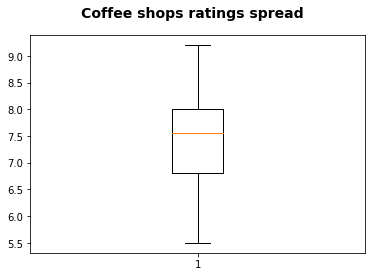

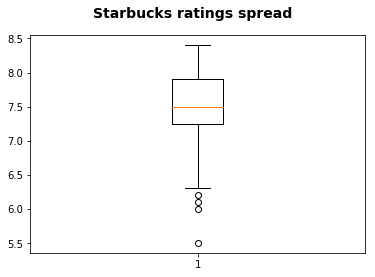

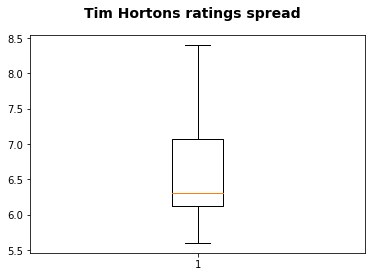

In [350]:
z=df_coffeeshops['VenueRating']
fig = plt.figure()
fig.suptitle('Coffee shops ratings spread', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(z)


z=test_Starbucks['VenueRating']
fig = plt.figure()
fig.suptitle('Starbucks ratings spread', fontsize=14, fontweight='bold')

ax1 = fig.add_subplot(111)
ax1.boxplot(z)


z=test_Tim_Hortons['VenueRating']
#plt.boxplot(z)
#plt.show()
fig = plt.figure()
fig.suptitle('Tim Hortons ratings spread', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(z)

#ax.set_title('axes title')
#ax.set_xlabel('xlabel')
#ax.set_ylabel('ylabel')


In [343]:
map_coffeeshops = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
#x = np.arange(kclusters)
#ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['green','yellow','red']#,'orange','black']
# add markers to the map
markers_colors = []
for lat, lon, poi,NumberofRating, color,Venue in zip(df_coffeeshops['Venue Latitude'], df_coffeeshops['Venue Longitude'], df_coffeeshops['VenueRating'], df_coffeeshops['NumberofRating'],df_coffeeshops['color'],df_coffeeshops['Venue']):
    label = folium.Popup(str(Venue)+': VenueRating: '+str(poi) + ' NumberofRating: ' + str(NumberofRating), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[color-1],
        fill=True,
        fill_color=rainbow[color-1],
        fill_opacity=0.7).add_to(map_coffeeshops)
       
map_coffeeshops

In [353]:
map_starbucks = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
#x = np.arange(kclusters)
#ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['green','yellow','red']#,'orange','black']
# add markers to the map
markers_colors = []
for lat, lon, poi,NumberofRating, color,Venue in zip(test_Starbucks['Venue Latitude'], test_Starbucks['Venue Longitude'], test_Starbucks['VenueRating'], test_Starbucks['NumberofRating'],test_Starbucks['color'],test_Starbucks['Venue']):
    label = folium.Popup(str(Venue)+': VenueRating: '+str(poi) + ' NumberofRating: ' + str(NumberofRating), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[color-1],
        fill=True,
        fill_color=rainbow[color-1],
        fill_opacity=0.7).add_to(map_starbucks)
       
map_starbucks

In [354]:
map_timhortons = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
#x = np.arange(kclusters)
#ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['green','yellow','red']#,'orange','black']
# add markers to the map
markers_colors = []
for lat, lon, poi,NumberofRating, color,Venue in zip(test_Tim_Hortons['Venue Latitude'], test_Tim_Hortons['Venue Longitude'], test_Tim_Hortons['VenueRating'], test_Tim_Hortons['NumberofRating'],test_Tim_Hortons['color'],test_Tim_Hortons['Venue']):
    label = folium.Popup(str(Venue)+': VenueRating: '+str(poi) + ' NumberofRating: ' + str(NumberofRating), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[color-1],
        fill=True,
        fill_color=rainbow[color-1],
        fill_opacity=0.7).add_to(map_timhortons)
       
map_timhortons